# <font color='Blue'>📦 Projeto: Modelagem do Tempo Total de Entrega</font>
<hr style='border: 2px solid Blue;'>

# <font color='orange' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid orange;'>

In [1]:
from src.functions import *
import warnings
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings
# from pyspark.sql import SparkSession, Row 
# from pyspark.sql.functions import *
# import pyspark.sql.functions as F

# <font color='orange' style='font-size: 40px;'> 1. Leitura do Dataset </font>
<hr style='border: 2px solid orange;'>

https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center?resource=download

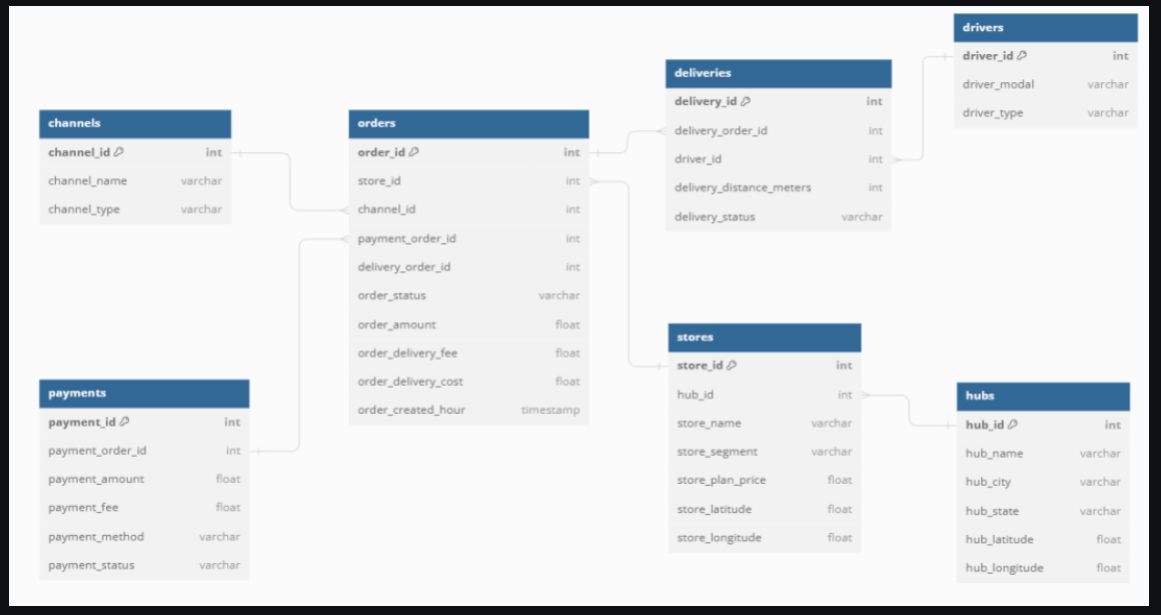


## 1.1.1) Channels

> 1. Este dataset possui informações sobre os canais de venda (marketplaces) onde são vendidos os good e food de nossos lojistas.

- **Channel ID:** Identificador único do canal de vendas.
- **Channel Name:** Nome do canal de vendas.
- **Channel Type:** Tipo de canal de vendas.

## 1.1.2) Deliveries

> 1. Este dataset possui informações sobre as entregas realizadas por nossos entregadores parceiros.

- **Delivery Id:** Identificador único da entrega.
- **Delivery Order ID:** Identificador único do pedido.
- **Driver Id:** Identificador do entregador responsável pela entrega.
- **Delivery Distance Meters:** Distância total percorrida para a entrega, em metros.
- **Delivery Status:** Status atual da entrega.

## 1.1.3) Drivers

> 1. Este dataset possui informações sobre os entregadores parceiros. Eles ficam em nossos hubs e toda vez que um pedido é processado, são eles fazem as entregas na casa dos consumidores.

- **Driver Id:** Identificador único do entregador.
- **Driver Modal:** Modalidade de transporte utilizada pelo entregador.
- **Driver Type:** Tipo de entregador.

## 1.1.4) Hubs

> 1. Este dataset possui informações sobre os hubs do Delivery Center. Entenda que os Hubs são os centros de distribuição dos pedidos e é dali que saem as entregas.

- **Hub ID:** Identificador único do hub.
- **Hub Name:** Nome do hub.
- **Hub City:** Cidade onde o hub está localizado.
- **Hub State:** Estado onde o hub está localizado.
- **Hub Latitude:** Latitude da localização do hub.
- **Hub Longitude:** Longitude da localização do hub.

## 1.1.5) Orders

> 1. Este dataset possui informações sobre as vendas processadas através da plataforma do Delivery Center.

- **Delivery Order ID:** Identificador único do pedido.
- **Store ID:** Identificador da loja que recebeu o pedido.
- **Channel ID:** Identificador do canal pelo qual o pedido foi realizado.
- **Order Status:** Status atual do pedido.
- **Order Amount:** Valor total do pedido.
- **Order Delivery Fee:** Taxa de entrega cobrada ao cliente.
- **Order Delivery Cost:** Custo da entrega para a plataforma ou loja.
- **Order Created Hour:** Hora em que o pedido foi criado.
- **Order Created Minute:** Minuto em que o pedido foi criado.
- **Order Created Day:** Dia em que o pedido foi criado.
- **Order Created Month:** Mês em que o pedido foi criado.
- **Order Created Year:** Ano em que o pedido foi criado.
- **Order Moment Created:** Momento exato em que o pedido foi criado.
- **Order Moment Accepted:** Momento em que o pedido foi aceito pela loja.
- **Order Moment Ready:** Momento em que o pedido ficou pronto para entrega.
- **Order Moment Collected:** Momento em que o pedido foi coletado pelo entregador.
- **Order Moment In Expedition:** Momento em que o pedido entrou em expedição.
- **Order Moment Delivering:** Momento em que o pedido está sendo entregue.
- **Order Moment Delivered:** Momento em que o pedido foi entregue ao cliente.
- **Order Moment Finished:** Momento em que o pedido foi finalizado no sistema.

## 1.1.6) Payments

> 1. Este dataset possui informações sobre os pagamentos realizados ao Delivery Center.

- **Payment ID:** Identificador único do pagamento.
- **Delivery Order ID:** Identificador único do pedido.
- **Payment Amount:** Valor total pago pelo cliente.
- **Payment Fee:** Taxa de processamento do pagamento.
- **Payment Method:** Método de pagamento utilizado pelo cliente.
- **Payment Status:** Status atual do pagamento.

## 1.1.7) Stores

> 1. Este dataset possui informações sobre os lojistas. Eles utilizam a Plataforma do Delivery Center para vender seus itens (good e/ou food) nos marketplaces.

- **Store ID:** Identificador único da loja.
- **Hub ID:** Identificador do hub ao qual a loja está associada.
- **Store Name:** Nome da loja.
- **Store Segment:** Segmento ou categoria da loja.
- **Store Plan Price:** Preço do plano de assinatura da loja na plataforma.
- **Store Latitude:** Latitude da localização da loja.
- **Store Longitude:** Longitude da localização da loja.


In [56]:
df_orders = (
    pd.read_csv('../Modelo_Delivery/data/orders.csv')
    .drop(['order_id', 'payment_order_id'], axis = 1)
    .rename(
        {
            'delivery_order_id':'delivery_order_id',
            'channel_id':'channel_id',
            'store_id':'store_id',
        },
        axis = 1
    )
)
df_channels = pd.read_csv('../Modelo_Delivery/data/channels.csv')
df_deliveries = pd.read_csv('../Modelo_Delivery/data/deliveries.csv')
df_drivers = pd.read_csv('../Modelo_Delivery/data/drivers.csv')
df_hubs = pd.read_csv('../Modelo_Delivery/data/hubs.csv', encoding='latin-1')
df_payments = pd.read_csv('../Modelo_Delivery/data/payments.csv').rename({'payment_order_id':'delivery_order_id'}, axis=1)
df_stores = pd.read_csv('../Modelo_Delivery/data/stores.csv', encoding='latin-1')

In [57]:
colunas_renomeadas = {
    # ------------------- ORDERS -------------------
    'store_id': 'id_loja',
    'channel_id': 'id_canal',
    'delivery_order_id': 'id_pedido_entrega',
    'order_status': 'status_pedido',
    'order_amount': 'valor_pedido',
    'order_delivery_fee': 'taxa_entrega_cliente',
    'order_delivery_cost': 'custo_entrega_plataforma',
    'order_created_hour': 'hora_criacao_pedido',
    'order_created_minute': 'minuto_criacao_pedido',
    'order_created_day': 'dia_criacao_pedido',
    'order_created_month': 'mes_criacao_pedido',
    'order_created_year': 'ano_criacao_pedido',
    'order_moment_created': 'momento_criacao_pedido',
    'order_moment_accepted': 'momento_aceite_pedido',
    'order_moment_ready': 'momento_pedido_pronto',
    'order_moment_collected': 'momento_pedido_coletado',
    'order_moment_in_expedition': 'momento_pedido_expedicao',
    'order_moment_delivering': 'momento_pedido_em_entrega',
    'order_moment_delivered': 'momento_pedido_entregue',
    'order_moment_finished': 'momento_pedido_finalizado',

    # Métricas de tempo do pedido
    'order_metric_collected_time': 'tempo_coleta_pedido',
    'order_metric_paused_time': 'tempo_pedido_pausado',
    'order_metric_production_time': 'tempo_producao_pedido',
    'order_metric_walking_time': 'tempo_deslocamento_pedido',
    'order_metric_expediton_speed_time': 'tempo_expedicao_pedido',
    'order_metric_transit_time': 'tempo_transito_pedido',
    'order_metric_cycle_time': 'tempo_ciclo_pedido',

    # ------------------- CHANNELS -------------------
    'channel_name': 'nome_canal',
    'channel_type': 'tipo_canal',

    # ------------------- PAYMENTS -------------------
    'payment_id': 'id_pagamento',
    'payment_amount': 'valor_pagamento',
    'payment_fee': 'taxa_pagamento',
    'payment_method': 'metodo_pagamento',
    'payment_status': 'status_pagamento',

    # ------------------- DELIVERIES -------------------
    'delivery_id': 'id_entrega',
    'driver_id': 'id_entregador',
    'delivery_distance_meters': 'distancia_entrega_metros',
    'delivery_status': 'status_entrega',

    # ------------------- STORES -------------------
    'store_name': 'nome_loja',
    'store_segment': 'segmento_loja',
    'store_plan_price': 'preco_plano_loja',
    'store_latitude': 'latitude_loja',
    'store_longitude': 'longitude_loja',

    # ------------------- DRIVERS -------------------
    'driver_modal': 'modal_entregador',
    'driver_type': 'tipo_entregador',

    # ------------------- HUBS -------------------
    'hub_id': 'id_hub',
    'hub_name': 'nome_hub',
    'hub_city': 'cidade_hub',
    'hub_state': 'estado_hub',
    'hub_latitude': 'latitude_hub',
    'hub_longitude': 'longitude_hub',
}


df_full = (
    df_orders
    .merge(df_channels, on='channel_id', how='left') # Merge OK
    .merge(df_payments, on='delivery_order_id', how='left') # Merge Ok
    .merge(df_deliveries, on='delivery_order_id', how='left')
    .merge(df_stores, on='store_id', how='left')
    .merge(df_drivers, on='driver_id', how='left')
    .merge(df_hubs, on='hub_id', how='left')
)

df_full.rename(columns=colunas_renomeadas, inplace=True)

tempos = [
    'momento_criacao_pedido', 'momento_aceite_pedido', 'momento_pedido_pronto',
    'momento_pedido_coletado', 'momento_pedido_expedicao', 'momento_pedido_em_entrega',
    'momento_pedido_entregue', 'momento_pedido_finalizado'
]

for col in tempos:
    df_full[col] = pd.to_datetime(df_full[col], errors='coerce')

df_full["data_pedido"] = df_full["momento_criacao_pedido"].dt.date
df_full["dia_semana"] = df_full["momento_criacao_pedido"].dt.day_name()
df_full["hora_pedido"] = df_full["momento_criacao_pedido"].dt.hour


df_target = df_full.copy()

display(df_target.shape)
df_target.head()

(442239, 54)

,id_loja,id_canal,id_pedido_entrega,status_pedido,valor_pedido,taxa_entrega_cliente,custo_entrega_plataforma,hora_criacao_pedido,minuto_criacao_pedido,dia_criacao_pedido,mes_criacao_pedido,ano_criacao_pedido,momento_criacao_pedido,momento_aceite_pedido,momento_pedido_pronto,momento_pedido_coletado,momento_pedido_expedicao,momento_pedido_em_entrega,momento_pedido_entregue,momento_pedido_finalizado,tempo_coleta_pedido,tempo_pedido_pausado,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido,tempo_ciclo_pedido,nome_canal,tipo_canal,id_pagamento,valor_pagamento,taxa_pagamento,metodo_pagamento,status_pagamento,id_entrega,id_entregador,distancia_entrega_metros,status_entrega,id_hub,nome_loja,segmento_loja,preco_plano_loja,latitude_loja,longitude_loja,modal_entregador,tipo_entregador,nome_hub,cidade_hub,estado_hub,latitude_hub,longitude_hub,data_pedido,dia_semana,hora_pedido
0,3512,5,68405119,CANCELED,62.70,0.00,NaN,0,1,1,1,2021,2021-01-01 00:01:36,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
1,3512,5,68405123,CANCELED,62.70,0.00,NaN,0,4,1,1,2021,2021-01-01 00:04:26,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
2,3512,5,68405206,CANCELED,115.50,0.00,NaN,0,13,1,1,2021,2021-01-01 00:13:07,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
3,3401,5,68405465,CANCELED,55.90,0.00,NaN,0,19,1,1,2021,2021-01-01 00:19:15,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,FRUEOU,FOOD,49.90,-25.44,-49.28,NaN,NaN,HOTMILK SHOPPING,CURITIBA,PR,-25.44,-49.28,2021-01-01,Friday,0
4,3401,5,68406064,CANCELED,37.90,0.00,NaN,0,26,1,1,2021,2021-01-01 00:26:25,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,FRUEOU,FOOD,49.90,-25.44,-49.28,NaN,NaN,HOTMILK SHOPPING,CURITIBA,PR,-25.44,-49.28,2021-01-01,Friday,0


# <font color='orange' style='font-size: 40px;'> 2. Criação da Target </font>
<hr style='border: 2px solid orange;'>

> **Objetivo:** Criar a Target e preparar as Amostras de Treino, Validação, Teste e Out-Of-Time

# <font color='green' style='font-size: 30px;'> 2.1) Criação da Target </font>
<hr style='border: 2px solid green;'>



In [58]:
df_target["tempo_entrega"] = (df_target["momento_pedido_finalizado"] - df_target["momento_aceite_pedido"]).dt.total_seconds() / 60
df_target = df_target.loc[(df_target["status_pedido"] == 'FINISHED') & (df_target["status_entrega"] == 'DELIVERED') & df_target["tempo_entrega"].between(15, 260)].copy()

📊 ANÁLISE PSI TEMPORAL
Período base: 2021-01-01 a 2021-02-01
Período teste: 2021-03-01 a 2021-04-30
Registros base: 79,990 | Registros teste: 231,997


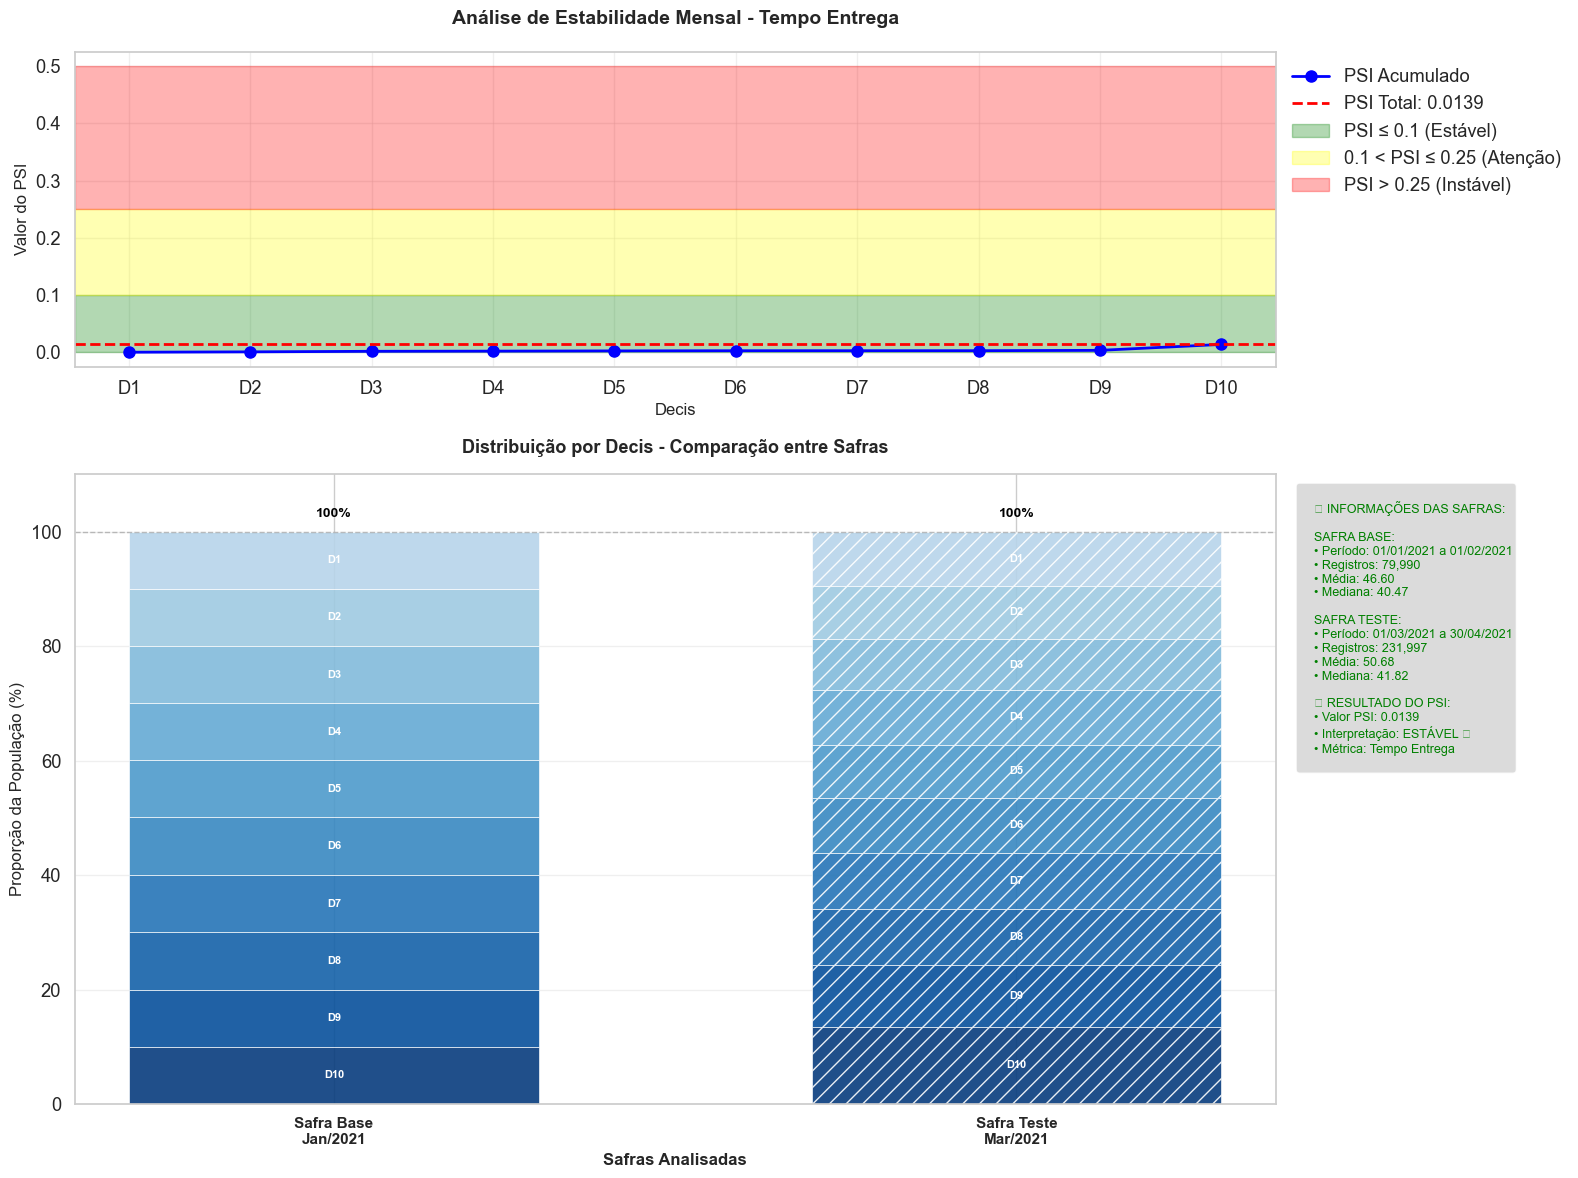


🎯 RESULTADO FINAL: PSI = 0.0139 - ESTÁVEL ✅

📋 DETALHAMENTO POR DECIL:
Decil  % Base     % Teste    Diferença    PSI Comp. 
------------------------------------------------------------
D1     9.98       9.50       -0.48        0.0002    
D2     10.02      9.23       -0.78        0.0006    
D3     9.98       9.02       -0.97        0.0010    
D4     9.98       9.45       -0.53        0.0003    
D5     9.99       9.36       -0.63        0.0004    
D6     10.05      9.52       -0.53        0.0003    
D7     9.98       9.76       -0.22        0.0000    
D8     10.02      9.88       -0.14        0.0000    
D9     9.99       10.79      0.79         0.0006    
D10    10.01      13.49      3.47         0.0103    


In [60]:
psi_valor, psi_df = calcular_psi_temporal(
    df=df_target,
    coluna_data='data_pedido',
    coluna_metricas='tempo_entrega',
    nome_metrica='Tempo Entrega',
    data_base_inicio='2021-01-01', 
    data_base_fim='2021-02-01',
    data_teste_inicio='2021-03-01',
    data_teste_fim='2021-04-30',
    tipo_analise='mensal'
)

# <font color='green' style='font-size: 30px;'> 2.2) Criação da Spine </font>
<hr style='border: 2px solid green;'>

> 1. Existem ID duplicados, como o ID Pagamento. As linhas sao todas iguais, mas o que muda é o ID e o valor em alguns casos, algo muito estranho. 

> 2. Além disso, o ID Entrega também está estranho, uma vez que aparentemente há mais entregas que pedidos 

> 3. Como a ideia será modelar o tempo de entrega, a chave primária do problema será o ID Pedido Entrega, que se refere aos pedidos, sendo assim, removeu-se duplicatas mantendo o ID Pedido Entrega como chave primária

🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:
Quantidade de Registros: 395,770

id_loja único: 836 - Identificador único da loja.
id_canal único: 38 - Identificador único do canal de vendas.
id_pedido_entrega único: 327,765 - Identificador único do pedido de entrega.
id_pagamento único: 375,555 - Identificador único do pagamento.
id_entrega único: 345,393 - Identificador único da entrega.
id_entregador único: 4,530 - Identificador único do entregador.
id_hub único: 27 - Identificador único do hub.

Entregas com múltiplos pedidos: 0

Existem 55 variáveis no Dataset
Existem 31 variáveis sem registros nulos no Dataset


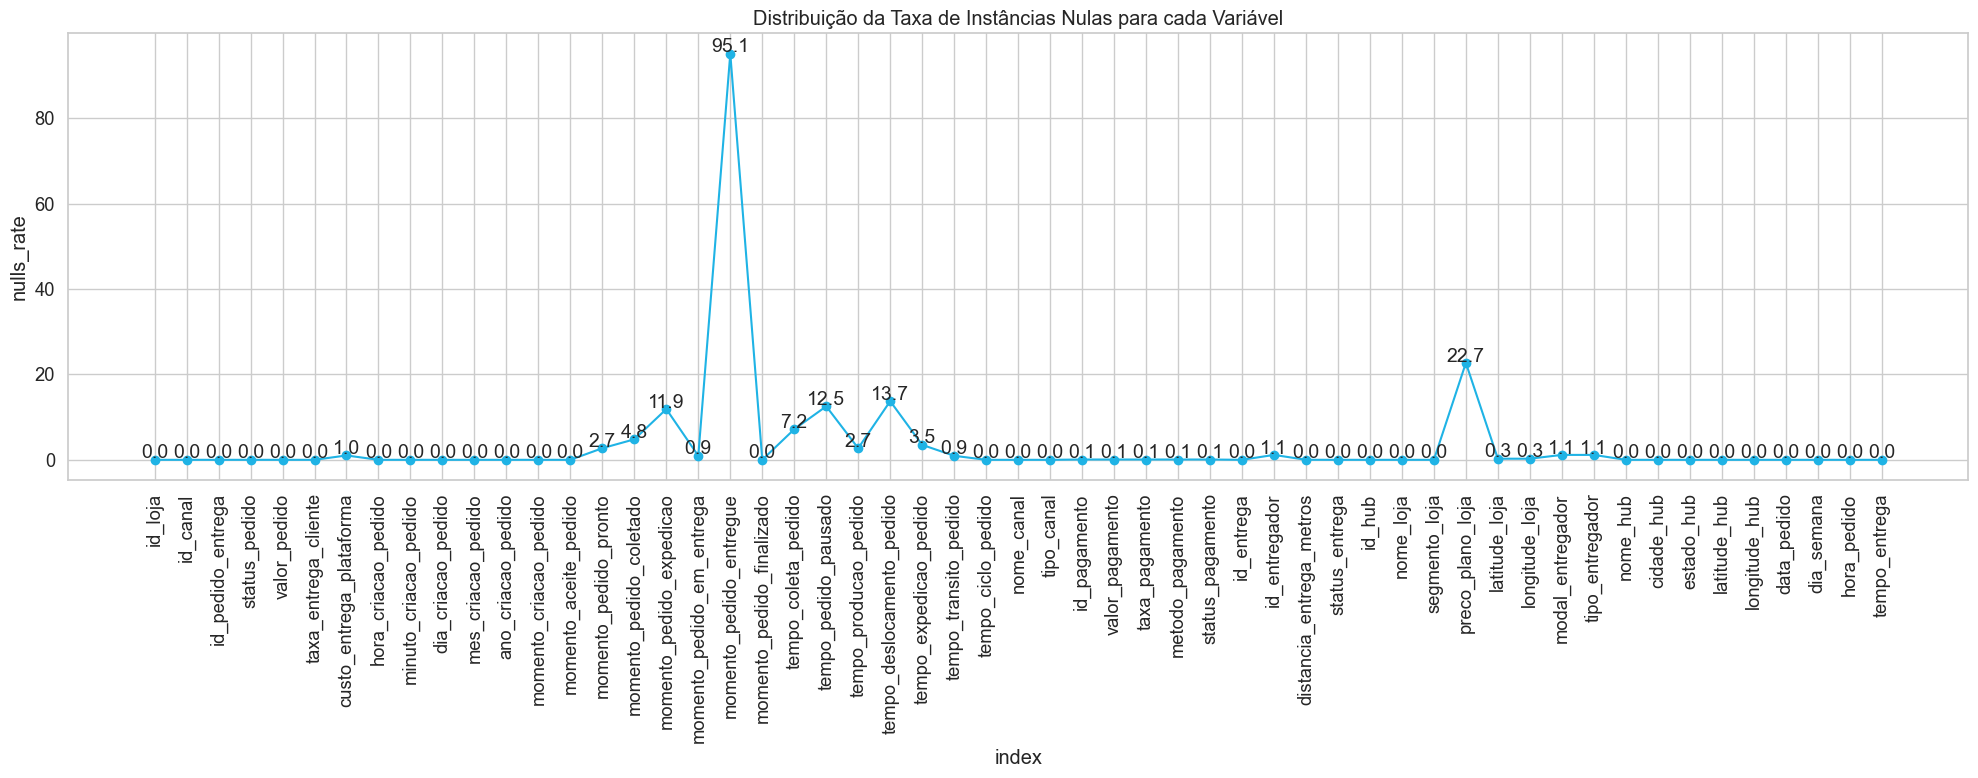

In [ ]:
print("🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:")

print(f"Quantidade de Registros: {df_target.shape[0]:,}")
print()
print(f"id_loja único: {df_target['id_loja'].nunique():,} - Identificador único da loja.")
print(f"id_canal único: {df_target['id_canal'].nunique():,} - Identificador único do canal de vendas.")
print(f"id_pedido_entrega único: {df_target['id_pedido_entrega'].nunique():,} - Identificador único do pedido de entrega.")
print(f"id_pagamento único: {df_target['id_pagamento'].nunique():,} - Identificador único do pagamento.")
print(f"id_entrega único: {df_target['id_entrega'].nunique():,} - Identificador único da entrega.")
print(f"id_entregador único: {df_target['id_entregador'].nunique():,} - Identificador único do entregador.")
print(f"id_hub único: {df_target['id_hub'].nunique():,} - Identificador único do hub.")

# Verificar se há múltiplos pedidos_entrega para mesma entrega
pedidos_por_entrega = df_target.groupby('id_entrega')['id_pedido_entrega'].nunique()
print(f"\nEntregas com múltiplos pedidos: {(pedidos_por_entrega > 1).sum()}")
print()

- Explorando ID Pagamento 

In [17]:
df_target.loc[df_target['id_entrega'] == 3108733.00].drop_duplicates()

,id_loja,id_canal,id_pedido_entrega,status_pedido,valor_pedido,taxa_entrega_cliente,custo_entrega_plataforma,hora_criacao_pedido,minuto_criacao_pedido,dia_criacao_pedido,mes_criacao_pedido,ano_criacao_pedido,momento_criacao_pedido,momento_aceite_pedido,momento_pedido_pronto,momento_pedido_coletado,momento_pedido_expedicao,momento_pedido_em_entrega,momento_pedido_entregue,momento_pedido_finalizado,tempo_coleta_pedido,tempo_pedido_pausado,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido,tempo_ciclo_pedido,nome_canal,tipo_canal,id_pagamento,valor_pagamento,taxa_pagamento,metodo_pagamento,status_pagamento,id_entrega,id_entregador,distancia_entrega_metros,status_entrega,id_hub,nome_loja,segmento_loja,preco_plano_loja,latitude_loja,longitude_loja,modal_entregador,tipo_entregador,nome_hub,cidade_hub,estado_hub,latitude_hub,longitude_hub,data_pedido,dia_semana,hora_pedido,tempo_entrega
389731,56,5,90945484,FINISHED,42.40,6.90,12.00,23,15,17,4,2021,2021-04-17 23:15:28,2021-04-17 23:15:31,2021-04-17 23:34:05,2021-04-17 23:35:21,2021-04-17 23:35:22,2021-04-17 23:38:41,NaT,2021-04-17 23:50:24,1.25,3.32,18.62,1.27,4.60,11.72,34.92,FOOD PLACE,MARKETPLACE,5346921.00,39.30,0.59,ONLINE,PAID,3108733.00,NaN,827.00,DELIVERED,8,SUPSIO,FOOD,49.00,-22.92,-43.23,NaN,NaN,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.92,-43.23,2021-04-17,Saturday,23,34.88
389733,56,5,90945484,FINISHED,42.40,6.90,12.00,23,15,17,4,2021,2021-04-17 23:15:28,2021-04-17 23:15:31,2021-04-17 23:34:05,2021-04-17 23:35:21,2021-04-17 23:35:22,2021-04-17 23:38:41,NaT,2021-04-17 23:50:24,1.25,3.32,18.62,1.27,4.60,11.72,34.92,FOOD PLACE,MARKETPLACE,5346922.00,10.00,0.00,VOUCHER,PAID,3108733.00,NaN,827.00,DELIVERED,8,SUPSIO,FOOD,49.00,-22.92,-43.23,NaN,NaN,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.92,-43.23,2021-04-17,Saturday,23,34.88


- Definição da Spine 

In [20]:
# Primeiro, ordenar pelo valor_pagamento em ordem decrescente
# Assim, quando remover duplicatas, manterá o maior valor
df_sorted = df_target.sort_values('valor_pagamento', ascending=False).copy()

# Remover duplicatas mantendo a primeira ocorrência (que será a com maior valor_pagamento)
df_target_sem_duplicatas= df_sorted.drop_duplicates(subset='id_pedido_entrega', keep='first')

print(f"Linhas antes: {len(df_target)}")
print(f"Linhas depois: {len(df_target_sem_duplicatas)}")
print(f"Registros duplicados removidos: {len(df_target) - len(df_target_sem_duplicatas)}")

Linhas antes: 395770
Linhas depois: 327765
Registros duplicados removidos: 68005


In [23]:
print("🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:")

print(f"Quantidade de Registros: {df_target_sem_duplicatas.shape[0]:,}")
print()
print(f"id_loja único: {df_target_sem_duplicatas['id_loja'].nunique():,} - Identificador único da loja.")
print(f"id_canal único: {df_target_sem_duplicatas['id_canal'].nunique():,} - Identificador único do canal de vendas.")
print(f"id_pedido_entrega único: {df_target_sem_duplicatas['id_pedido_entrega'].nunique():,} - Identificador único do pedido de entrega.")
print(f"id_pagamento único: {df_target_sem_duplicatas['id_pagamento'].nunique():,} - Identificador único do pagamento.")
print(f"id_entrega único: {df_target_sem_duplicatas['id_entrega'].nunique():,} - Identificador único da entrega.")
print(f"id_entregador único: {df_target_sem_duplicatas['id_entregador'].nunique():,} - Identificador único do entregador.")
print(f"id_hub único: {df_target_sem_duplicatas['id_hub'].nunique():,} - Identificador único do hub.")

# Verificar se há múltiplos pedidos_entrega para mesma entrega
pedidos_por_entrega = df_target_sem_duplicatas.groupby('id_entrega')['id_pedido_entrega'].nunique()
print(f"\nEntregas com múltiplos pedidos: {(pedidos_por_entrega > 1).sum()}")
print()

🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:
Quantidade de Registros: 327,765

id_loja único: 836 - Identificador único da loja.
id_canal único: 38 - Identificador único do canal de vendas.
id_pedido_entrega único: 327,765 - Identificador único do pedido de entrega.
id_pagamento único: 327,510 - Identificador único do pagamento.
id_entrega único: 327,765 - Identificador único da entrega.
id_entregador único: 4,515 - Identificador único do entregador.
id_hub único: 27 - Identificador único do hub.

Entregas com múltiplos pedidos: 0



# <font color='green' style='font-size: 30px;'> 2.3) Criação das Amostras de Treino, Validação, Teste e Out-Of-Time </font>
<hr style='border: 2px solid green;'>

> 1. A fim de evitar Data Leakage, decidiu-se separar os dados em treino, validação, teste e oot

> 2. Para cenário, separou-se da seguinte maneira:

- Treino + Validação --> 80% dos IDs entre 202101 e 202103, sendo 90% para Treinamento do Modelo e 10% para Validação.
- Teste --> 20% dos IDs do treino
- OOT --> Todos os IDs para 202104
- '202101', --> TREINAMENTO/VALIDACAO/TESTE
- '202102', --> TREINAMENTO/VALIDACAO/TESTE
- '202103', --> TREINAMENTO/VALIDACAO/TESTE
- '202104', --> OOT

> 3. As distribuições da Variável Resposta são semelhantes no Treino, Validação, Teste e Out-of-Time



In [31]:
df_target_sem_duplicatas['safra'] = df_target_sem_duplicatas['momento_criacao_pedido'].dt.strftime('%Y%m')

amostra_treino_validacao = (
    df_target_sem_duplicatas
        .loc[~df_target_sem_duplicatas["safra"].isin(["202104"])]
        [["id_pedido_entrega"]]
        .drop_duplicates()
        .sample(frac = 0.8, random_state = 42, replace = False)
)

train = (
    amostra_treino_validacao.sample(frac = 0.9, random_state = 42, replace = False)
    [["id_pedido_entrega"]]
    .drop_duplicates()
) 

valid = (
    amostra_treino_validacao.loc[~amostra_treino_validacao["id_pedido_entrega"].isin(list(train["id_pedido_entrega"].unique()))]
    [["id_pedido_entrega"]]
    .drop_duplicates()
)

test = (
    df_target_sem_duplicatas
        .loc[
            (~df_target_sem_duplicatas["safra"].isin(["202104"])) & 
            (~df_target_sem_duplicatas["id_pedido_entrega"].isin(list(train["id_pedido_entrega"].unique()))) & 
            (~df_target_sem_duplicatas["id_pedido_entrega"].isin(list(valid["id_pedido_entrega"].unique())))
        ]
        [["id_pedido_entrega"]]
        .drop_duplicates()
)

oot = (
    df_target_sem_duplicatas
        .loc[
            (df_target_sem_duplicatas["safra"].isin(["202104"]))
        ]
        [["id_pedido_entrega"]]
        .drop_duplicates()
)

df_train = train.merge(df_target_sem_duplicatas.loc[~df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")
df_valid = valid.merge(df_target_sem_duplicatas.loc[~df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")
df_test = test.merge(df_target_sem_duplicatas.loc[~df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")
df_oot = oot.merge(df_target_sem_duplicatas.loc[df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")

print(f"A quantidade de amostras no Treino (202101~202103) é: {df_train.shape[0]}")
print(f"A quantidade de amostras na Validação (202101~202103) é: {df_valid.shape[0]}")
print(f"A quantidade de amostras no Teste (202101~202103) é: {df_test.shape[0]}")
print(f"A quantidade de amostras no OOT (202104) é: {df_oot.shape[0]}")

amostras = [df_train, df_valid, df_test, df_oot]
tipo = ["Treino", "Validação", "Teste", "OOT"]

A quantidade de amostras no Treino (202101~202103) é: 167204
A quantidade de amostras na Validação (202101~202103) é: 18578
A quantidade de amostras no Teste (202101~202103) é: 46446
A quantidade de amostras no OOT (202104) é: 95537



📊 ANALISANDO DISTRIBUIÇÃO DE: tempo_entrega

1. Gerando histogramas individuais...


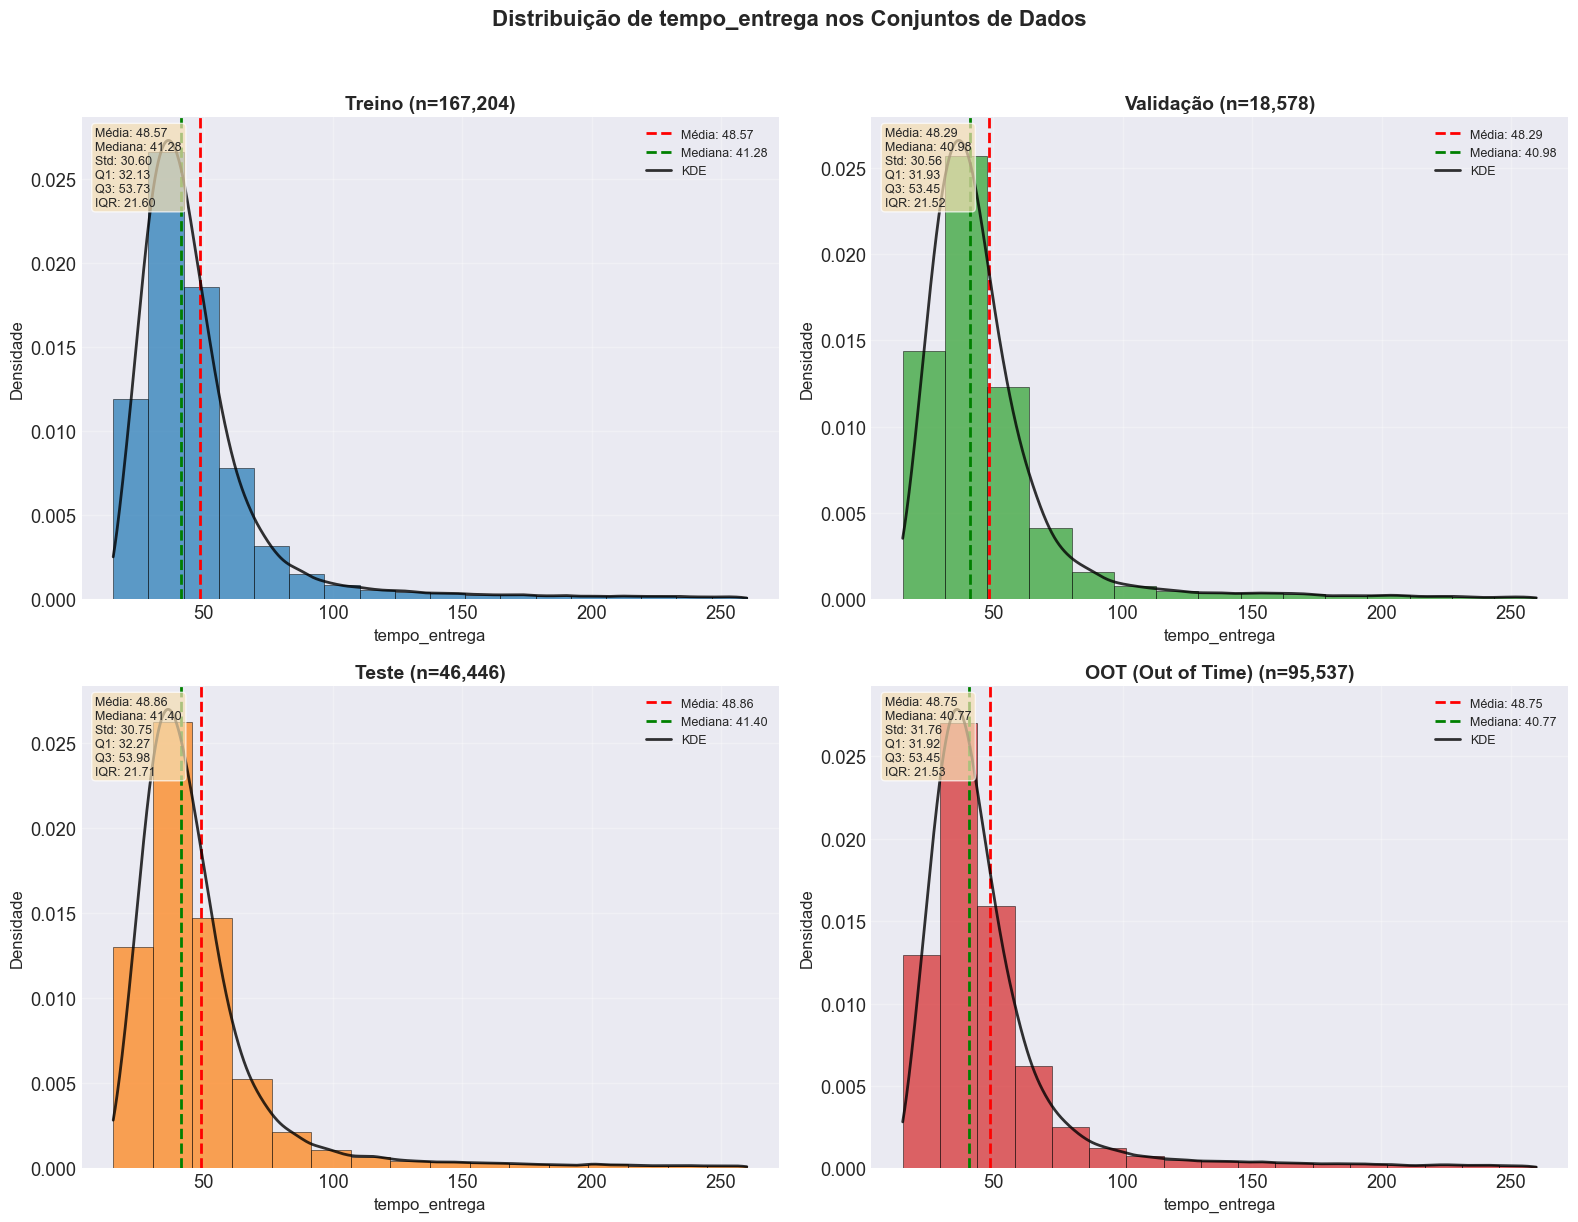


2. Gerando boxplot comparativo...


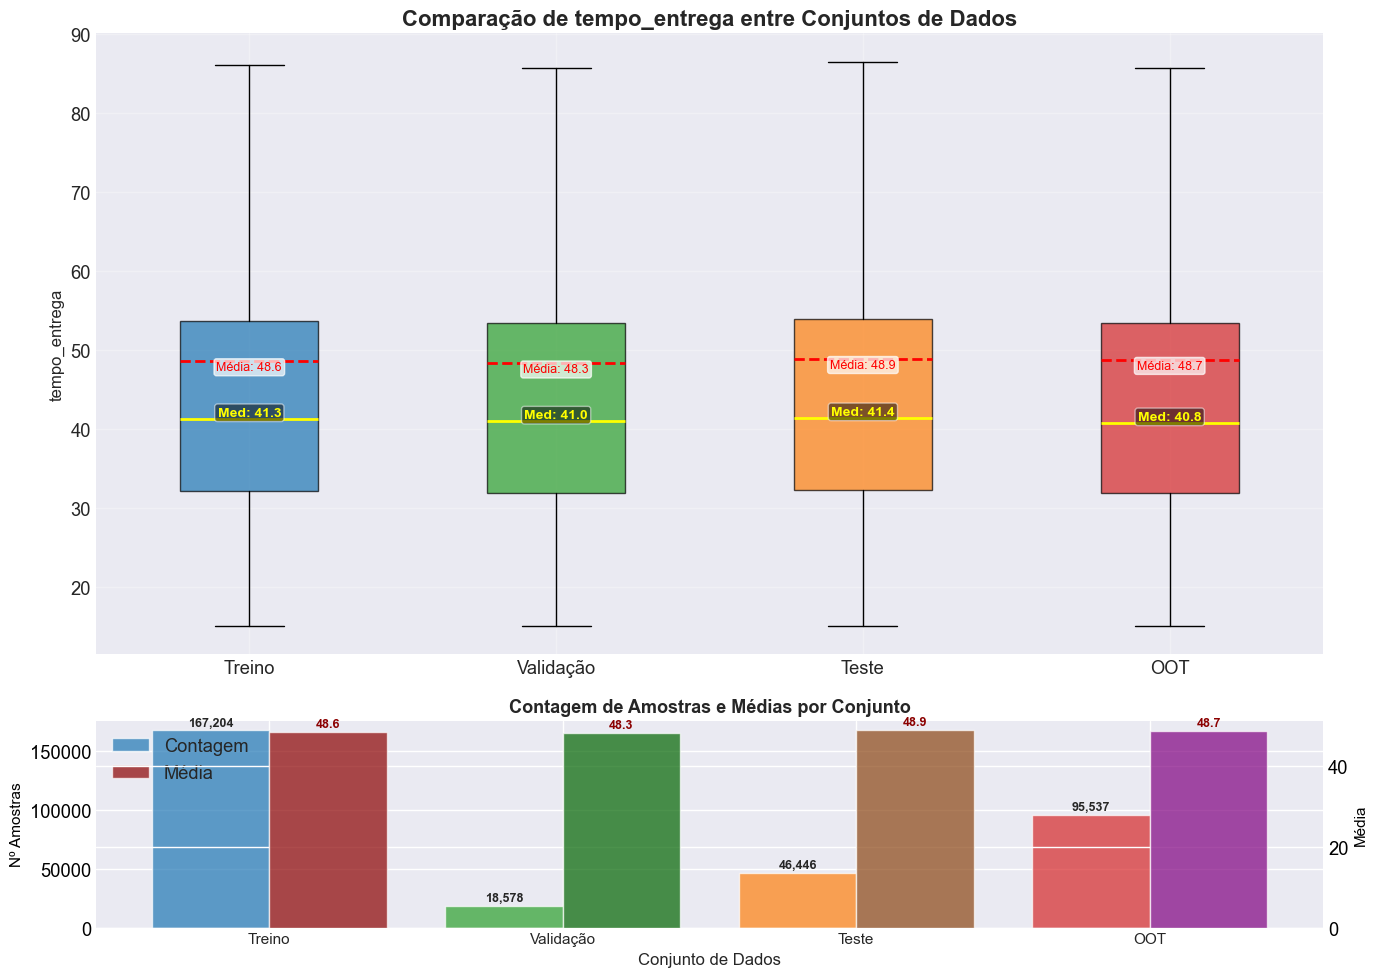


RESUMO ESTATÍSTICO - DISTRIBUIÇÃO DE TEMPO DE ENTREGA
 Conjunto Amostras Média Mediana   Std   Min    Max    Q1    Q3   IQR
   Treino  167,204 48.57   41.28 30.60 15.00 260.00 32.13 53.73 21.60
Validação   18,578 48.29   40.98 30.56 15.02 259.82 31.93 53.45 21.52
    Teste   46,446 48.86   41.40 30.75 15.00 259.98 32.27 53.98 21.71
      OOT   95,537 48.75   40.77 31.76 15.00 259.87 31.92 53.45 21.53

3. Gerando gráfico de densidade comparativo...


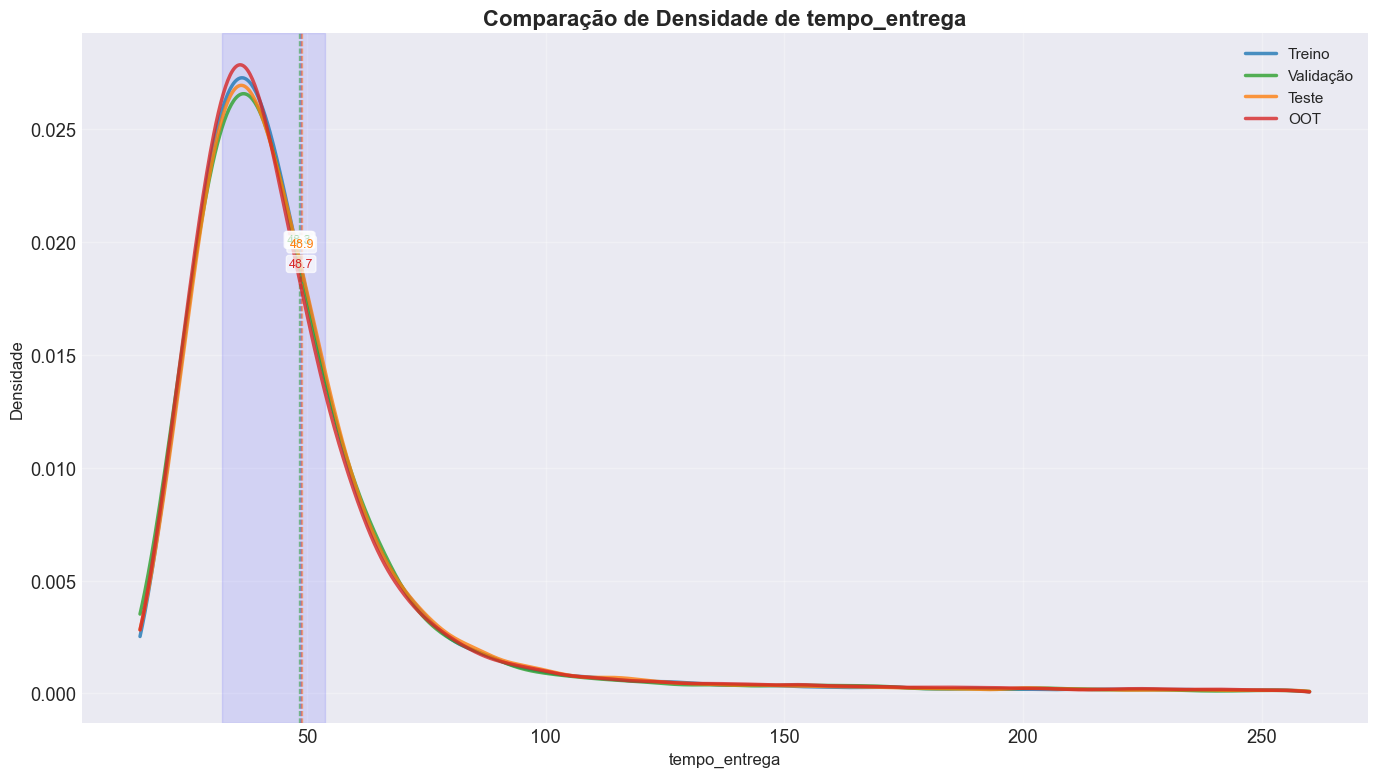

In [39]:
stats = visualize_all_comparisons(df_train, df_valid, df_test, df_oot, 'tempo_entrega')

In [ ]:
# df_train.to_csv('../Modelo_Delivery/data/df_train.csv', index=False)
# df_valid.to_csv('../Modelo_Delivery/data/df_valid.csv', index=False)
# df_test.to_csv('../Modelo_Delivery/data/df_test.csv', index=False)
# df_oot.to_csv('../Modelo_Delivery/data/df_oot.csv', index=False)

# <font color='orange' style='font-size: 40px;'> 3. Criação de Features </font>
<hr style='border: 2px solid orange;'>

> **Objetivo**: Esta Seção consolida propostas de features conceitualmente fortes e de implementação simples, organizadas em quatro eixos: **Features Convencionais**, **Estatística Espacial**, **Séries Temporais** e **Grafos**.

> **Pontos de Observação**: Trata-se de um problema de Interpolação, ou seja, embora tenhamos a série histórica de pedidos diários, os pedidos são independentes. 



Quantidade de Registros: 327,765
Index(['flag_amostra', 'tempo_entrega', 'safra', 'data_pedido',
       'dia_criacao_pedido', 'dia_semana', 'hora_pedido',
       'momento_criacao_pedido', 'id_pedido_entrega', 'id_canal', 'id_loja',
       'id_hub', 'id_entregador', 'nome_canal', 'nome_loja', 'cidade_hub',
       'metodo_pagamento', 'fl_tipo_canal', 'fl_segmento_loja',
       'fl_modal_entregador', 'fl_tipo_entregador', 'valor_pedido',
       'taxa_entrega_cliente', 'distancia_entrega_metros', 'latitude_loja',
       'longitude_loja', 'latitude_hub', 'longitude_hub',
       'tempo_coleta_pedido', 'tempo_producao_pedido',
       'tempo_deslocamento_pedido', 'tempo_expedicao_pedido',
       'tempo_transito_pedido'],
      dtype='object')


,flag_amostra,tempo_entrega,safra,data_pedido,dia_criacao_pedido,dia_semana,hora_pedido,momento_criacao_pedido,id_pedido_entrega,id_canal,id_loja,id_hub,id_entregador,nome_canal,nome_loja,cidade_hub,metodo_pagamento,fl_tipo_canal,fl_segmento_loja,fl_modal_entregador,fl_tipo_entregador,valor_pedido,taxa_entrega_cliente,distancia_entrega_metros,latitude_loja,longitude_loja,latitude_hub,longitude_hub,tempo_coleta_pedido,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido
13684,treino,41.15,202101,2021-01-01,1,Friday,21,2021-01-01 21:24:17,68505583,5,8,3,15086.00,FOOD PLACE,RASMUR S,PORTO ALEGRE,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,30.00,9.90,3186.00,-30.04,-51.20,-30.04,-51.20,0.48,33.67,0.50,1.42,9.53
109797,treino,55.85,202101,2021-01-01,1,Friday,16,2021-01-01 16:34:42,68441526,5,149,8,319.00,FOOD PLACE,IUMPICA,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,FREELANCE,177.10,11.90,2107.00,-22.92,-43.23,-22.92,-43.23,1.48,17.93,1.77,6.48,32.20
50664,treino,75.37,202101,2021-01-01,1,Friday,21,2021-01-01 21:26:05,68506311,5,658,29,28165.00,FOOD PLACE,IUMPICA,SÃO PAULO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,FREELANCE,228.30,11.90,3645.00,-23.56,-46.56,-23.56,-46.56,0.88,25.30,4.93,12.93,37.27
38927,treino,39.02,202101,2021-01-01,1,Friday,15,2021-01-01 15:06:31,68418711,5,998,20,12893.00,FOOD PLACE,TRAZ LOURA RIRMAM,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,FREELANCE,69.00,9.90,3484.00,-23.00,-43.36,-23.00,-43.36,1.05,21.88,2.28,2.75,15.20
38933,treino,29.78,202101,2021-01-01,1,Friday,17,2021-01-01 17:09:32,68449304,5,149,8,28171.00,FOOD PLACE,IUMPICA,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,BIKER,FREELANCE,117.25,11.90,516.00,-22.92,-43.23,-22.92,-43.23,1.17,15.27,1.28,4.08,10.52


Existem 33 variáveis no Dataset
Existem 21 variáveis sem registros nulos no Dataset


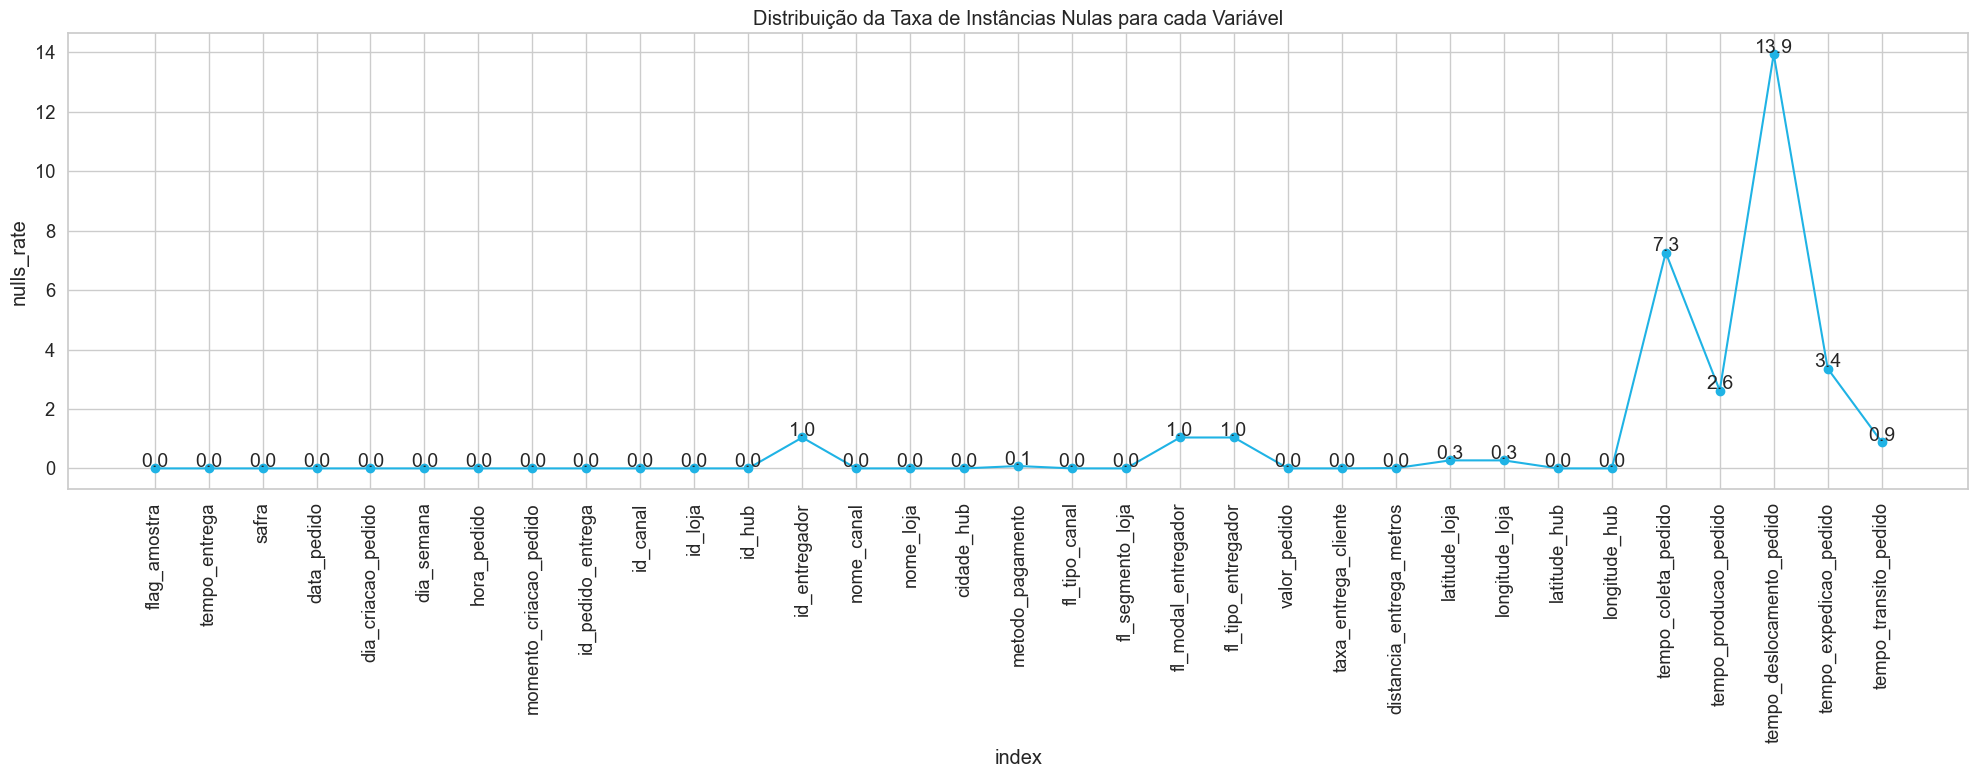

In [46]:
df_train = pd.read_csv('../Modelo_Delivery/data/df_train.csv').drop(['hora_criacao_pedido', 'minuto_criacao_pedido',
       'mes_criacao_pedido', 'ano_criacao_pedido',
       'momento_aceite_pedido', 'momento_pedido_pronto',
       'momento_pedido_coletado', 'momento_pedido_expedicao',
       'momento_pedido_em_entrega', 'momento_pedido_entregue',
       'momento_pedido_finalizado', 'tempo_pedido_pausado', 'tempo_ciclo_pedido', 'estado_hub'], axis = 1)
df_train['flag_amostra'] = 'treino'
df_valid = pd.read_csv('../Modelo_Delivery/data/df_valid.csv').drop(['hora_criacao_pedido', 'minuto_criacao_pedido',
       'mes_criacao_pedido', 'ano_criacao_pedido',
       'momento_aceite_pedido', 'momento_pedido_pronto',
       'momento_pedido_coletado', 'momento_pedido_expedicao',
       'momento_pedido_em_entrega', 'momento_pedido_entregue',
       'momento_pedido_finalizado', 'tempo_pedido_pausado', 'tempo_ciclo_pedido', 'estado_hub'], axis = 1)
df_valid['flag_amostra'] = 'validacao'
df_test = pd.read_csv('../Modelo_Delivery/data/df_test.csv').drop(['hora_criacao_pedido', 'minuto_criacao_pedido',
       'mes_criacao_pedido', 'ano_criacao_pedido',
       'momento_aceite_pedido', 'momento_pedido_pronto',
       'momento_pedido_coletado', 'momento_pedido_expedicao',
       'momento_pedido_em_entrega', 'momento_pedido_entregue',
       'momento_pedido_finalizado', 'tempo_pedido_pausado', 'tempo_ciclo_pedido', 'estado_hub'], axis = 1)
df_test['flag_amostra'] = 'teste'
df_oot = pd.read_csv('../Modelo_Delivery/data/df_oot.csv').drop(['hora_criacao_pedido', 'minuto_criacao_pedido',
       'mes_criacao_pedido', 'ano_criacao_pedido',
       'momento_aceite_pedido', 'momento_pedido_pronto',
       'momento_pedido_coletado', 'momento_pedido_expedicao',
       'momento_pedido_em_entrega', 'momento_pedido_entregue',
       'momento_pedido_finalizado', 'tempo_pedido_pausado', 'tempo_ciclo_pedido', 'estado_hub'], axis = 1)
df_oot['flag_amostra'] = 'oot'

df_train = df_train[['flag_amostra', 'tempo_entrega', # Target
 'safra', 'data_pedido', 'dia_criacao_pedido', 'dia_semana', 'hora_pedido', 'momento_criacao_pedido', # Datas para Referência Temporal
 'id_pedido_entrega', 'id_canal', 'id_loja', 'id_hub', 'id_entregador', # IDs
 'nome_canal', 'nome_loja', 'cidade_hub', # Categorias de Canais, Loja e Hub
 'metodo_pagamento', # Categorias de Pagamento
 'tipo_canal', 'segmento_loja', 'modal_entregador', 'tipo_entregador', # Flags Binárias
 'valor_pedido', 'taxa_entrega_cliente', # Valores Monetários
 'distancia_entrega_metros', 'latitude_loja', 'longitude_loja', 'latitude_hub', 'longitude_hub', # Valores Geográficos
 'tempo_coleta_pedido', 'tempo_producao_pedido', 'tempo_deslocamento_pedido', 'tempo_expedicao_pedido', 'tempo_transito_pedido' # Valores Temporais  
]].sort_values(by = 'data_pedido', ascending = True).rename({'tipo_canal':'fl_tipo_canal', 'segmento_loja':'fl_segmento_loja', 'modal_entregador':'fl_modal_entregador', 'tipo_entregador':'fl_tipo_entregador'}, axis = 1)

df_valid = df_valid[['flag_amostra', 'tempo_entrega', # Target
 'safra', 'data_pedido', 'dia_criacao_pedido','dia_semana', 'hora_pedido', 'momento_criacao_pedido', # Datas para Referência Temporal
 'id_pedido_entrega', 'id_canal', 'id_loja', 'id_hub', 'id_entregador', # IDs
 'nome_canal', 'nome_loja', 'cidade_hub', # Categorias de Canais, Loja e Hub
 'metodo_pagamento', # Categorias de Pagamento
 'tipo_canal', 'segmento_loja', 'modal_entregador', 'tipo_entregador', # Flags Binárias
 'valor_pedido', 'taxa_entrega_cliente', # Valores Monetários
 'distancia_entrega_metros', 'latitude_loja', 'longitude_loja', 'latitude_hub', 'longitude_hub', # Valores Geográficos
 'tempo_coleta_pedido', 'tempo_producao_pedido', 'tempo_deslocamento_pedido', 'tempo_expedicao_pedido', 'tempo_transito_pedido' # Valores Temporais  
]].sort_values(by = 'data_pedido', ascending = True).rename({'tipo_canal':'fl_tipo_canal', 'segmento_loja':'fl_segmento_loja', 'modal_entregador':'fl_modal_entregador', 'tipo_entregador':'fl_tipo_entregador'}, axis = 1)

df_test = df_test[['flag_amostra', 'tempo_entrega', # Target
 'safra', 'data_pedido', 'dia_criacao_pedido', 'dia_semana', 'hora_pedido', 'momento_criacao_pedido', # Datas para Referência Temporal
 'id_pedido_entrega', 'id_canal', 'id_loja', 'id_hub', 'id_entregador', # IDs
 'nome_canal', 'nome_loja', 'cidade_hub', # Categorias de Canais, Loja e Hub
 'metodo_pagamento', # Categorias de Pagamento
 'tipo_canal', 'segmento_loja', 'modal_entregador', 'tipo_entregador', # Flags Binárias
 'valor_pedido', 'taxa_entrega_cliente', # Valores Monetários
 'distancia_entrega_metros', 'latitude_loja', 'longitude_loja', 'latitude_hub', 'longitude_hub', # Valores Geográficos
 'tempo_coleta_pedido', 'tempo_producao_pedido', 'tempo_deslocamento_pedido', 'tempo_expedicao_pedido', 'tempo_transito_pedido' # Valores Temporais  
]].sort_values(by = 'data_pedido', ascending = True).rename({'tipo_canal':'fl_tipo_canal', 'segmento_loja':'fl_segmento_loja', 'modal_entregador':'fl_modal_entregador', 'tipo_entregador':'fl_tipo_entregador'}, axis = 1)

df_oot = df_oot[['flag_amostra', 'tempo_entrega', # Target
 'safra', 'data_pedido', 'dia_criacao_pedido','dia_semana', 'hora_pedido', 'momento_criacao_pedido', # Datas para Referência Temporal
 'id_pedido_entrega', 'id_canal', 'id_loja', 'id_hub', 'id_entregador', # IDs
 'nome_canal', 'nome_loja', 'cidade_hub', # Categorias de Canais, Loja e Hub
 'metodo_pagamento', # Categorias de Pagamento
 'tipo_canal', 'segmento_loja', 'modal_entregador', 'tipo_entregador', # Flags Binárias
 'valor_pedido', 'taxa_entrega_cliente', # Valores Monetários
 'distancia_entrega_metros', 'latitude_loja', 'longitude_loja', 'latitude_hub', 'longitude_hub', # Valores Geográficos
 'tempo_coleta_pedido', 'tempo_producao_pedido', 'tempo_deslocamento_pedido', 'tempo_expedicao_pedido', 'tempo_transito_pedido' # Valores Temporais  
]].sort_values(by = 'data_pedido', ascending = True).rename({'tipo_canal':'fl_tipo_canal', 'segmento_loja':'fl_segmento_loja', 'modal_entregador':'fl_modal_entregador', 'tipo_entregador':'fl_tipo_entregador'}, axis = 1)

df_feat = pd.concat([df_train, df_valid, df_test, df_oot]).copy()
print(f"Quantidade de Registros: {df_feat.shape[0]:,}")
print(df_feat.columns)
display(df_feat.head())

# Análise de Nulos
df_nulls = (
    pd.DataFrame(
        df_feat
        .isnull().sum()
      )
      .reset_index()
      .rename({0:'nulls_amnt'}, axis = 1)
)
df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_feat.shape[0])*100, 2)

print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')

plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

In [63]:
df_feat.columns

Index(['flag_amostra', 'tempo_entrega', 'safra', 'data_pedido',
       'dia_criacao_pedido', 'dia_semana', 'hora_pedido',
       'momento_criacao_pedido', 'id_pedido_entrega', 'id_canal', 'id_loja',
       'id_hub', 'id_entregador', 'nome_canal', 'nome_loja', 'cidade_hub',
       'metodo_pagamento', 'fl_tipo_canal', 'fl_segmento_loja',
       'fl_modal_entregador', 'fl_tipo_entregador', 'valor_pedido',
       'taxa_entrega_cliente', 'distancia_entrega_metros', 'latitude_loja',
       'longitude_loja', 'latitude_hub', 'longitude_hub',
       'tempo_coleta_pedido', 'tempo_producao_pedido',
       'tempo_deslocamento_pedido', 'tempo_expedicao_pedido',
       'tempo_transito_pedido', 'fl_primeira_quinzena', 'fl_final_de_semana',
       'tempo_producao_pedido_lag1', 'tempo_entrega_lag1',
       'tempo_producao_pedido_loja_mm7',
       'variabilidade_producao_pedido_loja_mm7', 'valor_pedido_loja_mm7',
       'escore_complexidade_pedido', 'tempo_entrega_loja_mm7',
       'variabilidade_entreg

# <font color='green' style='font-size: 30px;'> 3.1) Criação das Features de Séries Temporais </font>
<hr style='border: 2px solid green;'>

#### **1. Variáveis Prontas** (FEITO)

- Valor do Pedido
- Taxa do Pedido
- Distância 
- Target Encoder Loja
- Target Encoder Hub

#### **2. Indicadores Temporais** (FEITO)
- Variável Categórica que indica se estamos no início ou final do mês
- Variável Categórica que indica se estamos no final de semana ou não

#### **3. Indicadores de Segmento** (FEITO)
- Variável Categórica que indica se o canal é marketplace ou canal próprio
- Variável Categórica que indica se a loja é de comida ou de bens de consumo
- Variável Categórica que indica se o pedido é entregue por um entregador de moto ou bike
- Variável Categórica que indica se o entregador é freelancer ou é um operador logístico contratado

#### **4. Variáveis de Eficiência** (FEITO)
- Variável que calcula o tempo médio de preparo dos últimos 7 pedidos da Loja
- Variável que calcula a variabilidade média de preparo dos últimos 7 pedidos da Loja
- Variável que calcula a velocidade média do tempo de trânsito do entregador dos últimos 7 pedidos
- Variável que calcula a variabilidade média do tempo de trânsito do entregador dos últimos 7 pedidos
- Variável que calcula o Valor do Pedido em relaçao ao Valor Médio da Loja para identificar pedidos complexos
- Variável que calcula o Tempo Médio de Entrega dos últimos 7 pedidos

#### **5. Variáveis de Alta Demanda** 
- Quantidade de pedidos por loja nas últimas 1 hora, últimas 2 horas, últimas 3 horas
- Quantidade de pedidos por hub nas últimas 1 hora, últimas 2 horas, últimas 3 horas
- Número de pedidos ainda em preparo no momento da criação do pedido.

#### **6. Variáveis de Estatística Espacial**
- Número de pedidos próximos (ex.: raio de 1 km) criados recentemente (Densidade de pedidos no entorno da loja)
- Razão entre a distância em linha reta e a distância real percorrida. (Tortuosidade do trajeto (distância reta vs. real))
- Diferença da distância entre o pedido anterior e o pedido atual (Distância do pedido anterior para o pedido atual)
- Assimetria da distância do pedido em relação à distância média das entregas da Loja (Quantidade de Desvios Padrões de diferença da média)
- Assimetria da distância do pedido em relação à distância média das entregas do Hub (Quantidade de Desvios Padrões de diferença da média)
- Número de lojas ativas num raio X

#### **7. Variáveis de Grafos**
- Quantidade de lojas atendidas pelo mesmo hub
- Quantidade de entregadores distintos nos últimos 7 dias
- % das entregas feitas pelos top 3 entregadores


In [47]:
########### Indicadores Temporais ###########
df_feat['fl_primeira_quinzena'] = np.where(df_feat['dia_criacao_pedido'] <= 15, 1, 0)
df_feat['fl_final_de_semana'] = np.where(df_feat['dia_semana'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

########### Indicadores de Segmento ###########
df_feat['fl_tipo_canal'] = np.where(df_feat['fl_tipo_canal'] == 'MARKETPLACE', 1, np.where(df_feat['fl_tipo_canal'] == 'OWN CHANNEL', 0, np.nan)) 
df_feat['fl_segmento_loja'] = np.where(df_feat['fl_segmento_loja'] == 'FOOD', 1, np.where(df_feat['fl_segmento_loja'] == 'GOOD', 0, np.nan)) 
df_feat['fl_modal_entregador'] = np.where(df_feat['fl_modal_entregador'] == 'MOTOBOY', 1, np.where(df_feat['fl_modal_entregador'] == 'BIKER', 0, np.nan)) 
df_feat['fl_tipo_entregador'] = np.where(df_feat['fl_tipo_entregador'] == 'FREELANCE', 1, np.where(df_feat['fl_tipo_entregador'] == 'LOGISTIC OPERATOR', 0, np.nan))

########### Variáveis de Eficiência ###########
df_feat = df_feat.copy()
df_feat = df_feat.sort_values(['id_loja', 'momento_criacao_pedido'])
df_feat['tempo_producao_pedido_lag1'] = df_feat.groupby('id_loja')['tempo_producao_pedido'].shift(1)
df_feat['tempo_entrega_lag1'] = df_feat.groupby('id_loja')['tempo_entrega'].shift(1)

grupo_var = (
    df_feat
    .groupby('id_loja')['tempo_producao_pedido_lag1']
    .shift(1)  # evita leakage
    .rolling(window=7,min_periods=1)
)
df_feat[f"tempo_producao_pedido_loja_mm7"] = grupo_var.mean()
df_feat[f"variabilidade_producao_pedido_loja_mm7"] = grupo_var.std()

grupo_var = (
    df_feat
    .groupby('id_loja')['valor_pedido']
    .shift(1)  # evita leakage
    .rolling(window=7,min_periods=1)
)
df_feat[f"valor_pedido_loja_mm7"] = grupo_var.mean()
df_feat[f"escore_complexidade_pedido"] = df_feat[f"valor_pedido"]/df_feat['valor_pedido_loja_mm7']

grupo_var = (
    df_feat
    .groupby('id_loja')['tempo_entrega_lag1']
    .shift(1)  # evita leakage
    .rolling(window=7,min_periods=1)
)
df_feat[f"tempo_entrega_loja_mm7"] = grupo_var.mean()
df_feat[f"variabilidade_entrega_loja_mm7"] = grupo_var.std()

df_feat = df_feat.sort_values(['id_entregador', 'momento_criacao_pedido'])
velocidade_lag = (df_feat['distancia_entrega_metros'] / df_feat['tempo_transito_pedido']).groupby(df_feat['id_entregador']).shift(1)

df_feat['velocidade_de_entrega_do_entregador_mm7'] = (
    velocidade_lag
    .groupby(df_feat['id_entregador'])
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

df_feat['eficiencia_entrega_do_entregador_mm7'] = (
    velocidade_lag
    .groupby(df_feat['id_entregador'])
    .transform(lambda x: x.rolling(7, min_periods=1).std())
)

# <font color='orange' style='font-size: 40px;'> 4. Modelagem </font>
<hr style='border: 2px solid orange;'>

> **Objetivo:** Criar o Modelo e Otimizar 

# <font color='green' style='font-size: 30px;'> 4.1) Pré-Processamento </font>
<hr style='border: 2px solid green;'>

